# Project 1: Prediction of CO2 emission via car characteristics
The goal of the project is to predict the amount of carbon dioxide emitted by different cars using supervised (in particular, regression is used here) and unsupervised (Clustering: K_means) learning techniques.
#### The research question we want to answer:
1. What is the amount of CO2 emitted by a car according to certain characteristics?

1. How can we group the quantity of CO2 emitted by cars according to their characteristics?

In [108]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import statsmodels.api as sm
# Plotting defaults
plt.rcParams['figure.figsize'] = (15, 8)
sns.set()
sns.set(font_scale=1.5)
# Display up to 80 columns to keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)
%matplotlib inline
from scipy import stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
path = 'C:\\Users\\LENOVO\\Documents\\data-20211119\\'
filename = 'CO2 Emissions_Canada.csv'
df = pd.read_csv(path+filename)

In [4]:
df.head(5)

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

# Exploratory data analysis:
##### In this part we are interested in exploring our dataset, in order to understand it well, and know the relationships between the variables, and then summarize their main characteristics using data visualization methods

In [5]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [6]:
#Renomer les colomes
df = df.rename(columns={'Fuel Consumption Comb (mpg)':'Fuel_Consumption_Comb'})
df = df.rename(columns={'Fuel Consumption City (L/100 km)':'Fuel_Consumption_City'})
df = df.rename(columns={'Fuel Consumption Hwy (L/100 km)':'Fuel_Consumption_Hwy'})
df = df.rename(columns={'CO2 Emissions(g/km)':'CO2_Emissions'})
df = df.rename(columns={'Fuel Consumption Comb (L/100 km)':'Fuel_Consumption_L'})
df = df.rename(columns={'Engine Size(L)':'Engine_Size'})


In [7]:
df.describe().T

count        mean        std   min    25%    50%  \
Engine_Size            7385.0    3.160068   1.354170   0.9    2.0    3.0   
Cylinders              7385.0    5.615030   1.828307   3.0    4.0    6.0   
Fuel_Consumption_City  7385.0   12.556534   3.500274   4.2   10.1   12.1   
Fuel_Consumption_Hwy   7385.0    9.041706   2.224456   4.0    7.5    8.7   
Fuel_Consumption_L     7385.0   10.975071   2.892506   4.1    8.9   10.6   
Fuel_Consumption_Comb  7385.0   27.481652   7.231879  11.0   22.0   27.0   
CO2_Emissions          7385.0  250.584699  58.512679  96.0  208.0  246.0   

                         75%    max  
Engine_Size              3.7    8.4  
Cylinders                6.0   16.0  
Fuel_Consumption_City   14.6   30.6  
Fuel_Consumption_Hwy    10.2   20.6  
Fuel_Consumption_L      12.6   26.1  
Fuel_Consumption_Comb   32.0   69.0  
CO2_Emissions          288.0  522.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   7385 non-null   object 
 1   Model                  7385 non-null   object 
 2   Vehicle Class          7385 non-null   object 
 3   Engine_Size            7385 non-null   float64
 4   Cylinders              7385 non-null   int64  
 5   Transmission           7385 non-null   object 
 6   Fuel Type              7385 non-null   object 
 7   Fuel_Consumption_City  7385 non-null   float64
 8   Fuel_Consumption_Hwy   7385 non-null   float64
 9   Fuel_Consumption_L     7385 non-null   float64
 10  Fuel_Consumption_Comb  7385 non-null   int64  
 11  CO2_Emissions          7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


In [9]:
df["Make"].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [10]:
df["Transmission"].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [11]:
df["Model"].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

#### Check for missing values

In [12]:
def missing_value(x):
    return sum(x.isnull())
#Applying per column:
print("Missing values per column:")
## Check how many are missing by column, and then check which ones have any missing values
print(df.apply(missing_value, axis=0).where(lambda x : x != 0).dropna().head(20))

Missing values per column:
Series([], dtype: float64)


##### Check if there are undefined values (i.e NaN)

In [13]:
def indefined_value(x):
    return sum(x.isnan())
#Applying per column:
print("indefined values per column:")
## Check how many are missing by column, and then check which ones have any missing values
print(df.apply(missing_value, axis=0).where(lambda x : x != 0).dropna().head(20))

indefined values per column:
Series([], dtype: float64)


#### Display the histograms associated with our numerical data:
We can see that our numerical data is slightly right skewed.

[None, None, None, None, None, None, None, None, None]

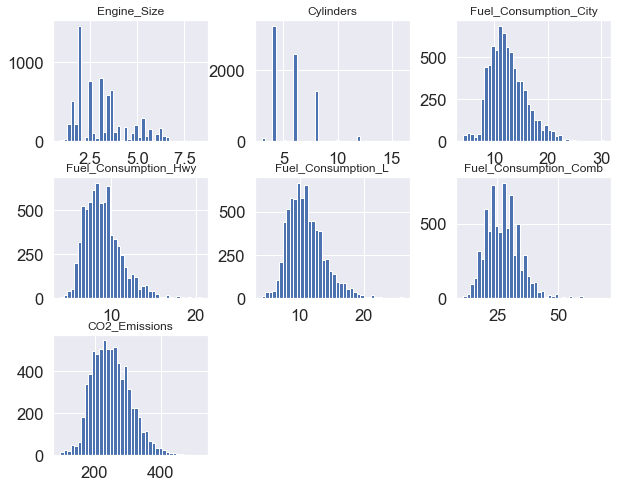

In [14]:
fig=df.hist(figsize=(10,8),bins=40)
[x.title.set_size(12) for x in fig.ravel()]

### View frequencies for non-numeric data
We can see that for the Fuel type, the 'N' type is almost negligible in front of the other types

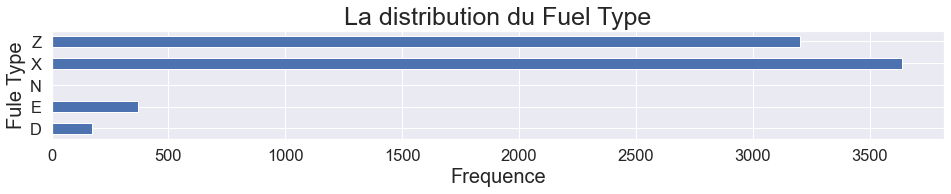

In [15]:
# La fréquence de chaque type de: Fuel Type
plt.figure(figsize=(16,2))
df.groupby('Fuel Type')['Fuel Type'].count().plot(kind='barh')
plt.title('La distribution du Fuel Type', fontsize=25)
plt.ylabel('Fule Type', fontsize=20)
plt.xlabel('Frequence', fontsize=20)
plt.show()

In [16]:
df[df['Fuel Type'] == 'N'].count()

Make                     1
Model                    1
Vehicle Class            1
Engine_Size              1
Cylinders                1
Transmission             1
Fuel Type                1
Fuel_Consumption_City    1
Fuel_Consumption_Hwy     1
Fuel_Consumption_L       1
Fuel_Consumption_Comb    1
CO2_Emissions            1
dtype: int64

##### We therefore observe that we only have one value for the Fuel type corresponding to N, so we will delete it because it will not have an influence on our data

In [17]:
ind = df.index[(df['Fuel Type'] == 'N')] # Trouver l'index associée a la ligne qu'on veut supprimer 
df = df.drop(ind)# Supprimer la ligne 

#### This distribution according to the manufacturers shows us that there are low frequencies on certain values of "Make" that could be removed

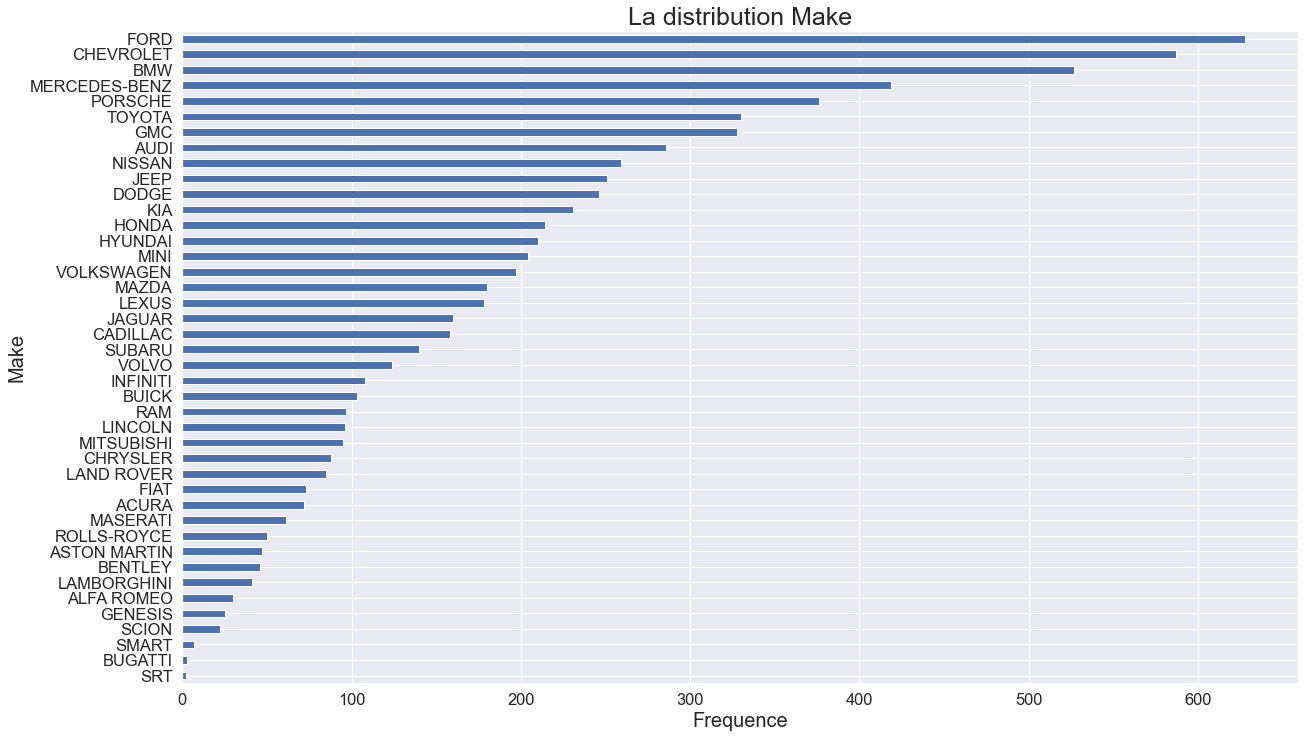

In [18]:
# La fréquence de de nos données selon les fabriquants 
plt.figure(figsize=(20,12))
df.groupby('Make')['Make'].count().sort_values().plot(kind='barh')
plt.title('La distribution Make', fontsize=25)
plt.ylabel('Make', fontsize=20)
plt.xlabel('Frequence', fontsize=20)
plt.show()

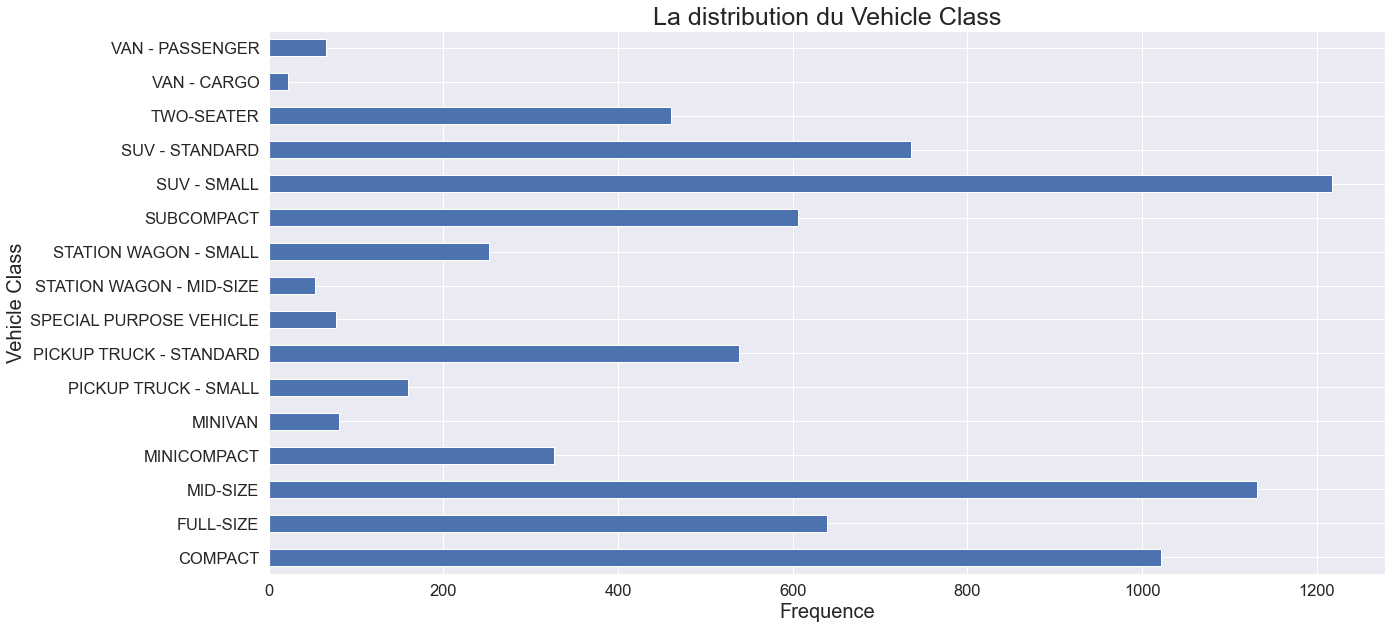

In [19]:
# La fréquence des vehicule Class
plt.figure(figsize=(20,10))
df.groupby('Vehicle Class')['Vehicle Class'].count().plot(kind='barh')
plt.title('La distribution du Vehicle Class', fontsize=25)
plt.ylabel('Vehicle Class', fontsize=20)
plt.xlabel('Frequence', fontsize=20)
plt.show()

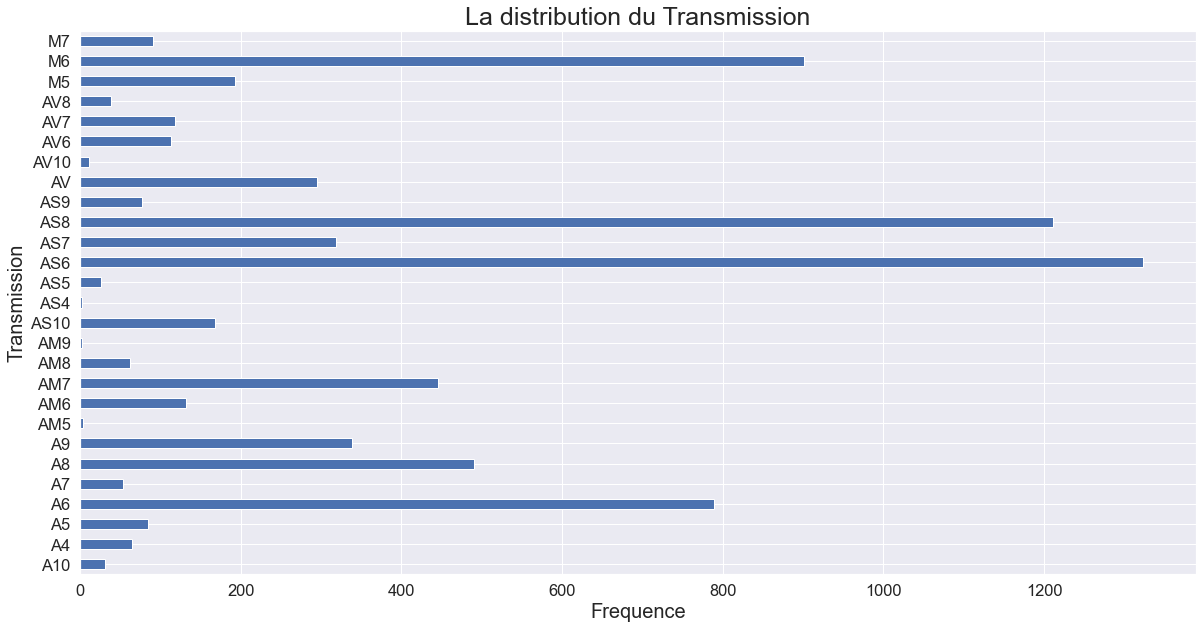

In [20]:
# La fréquence des vehicule Class
plt.figure(figsize=(20,10))
df.groupby('Transmission')['Transmission'].count().plot(kind='barh')
plt.title('La distribution du Transmission', fontsize=25)
plt.ylabel('Transmission', fontsize=20)
plt.xlabel('Frequence', fontsize=20)
plt.show()

##### We can see that the Class of the Vehicle influences the value of CO2 Emission

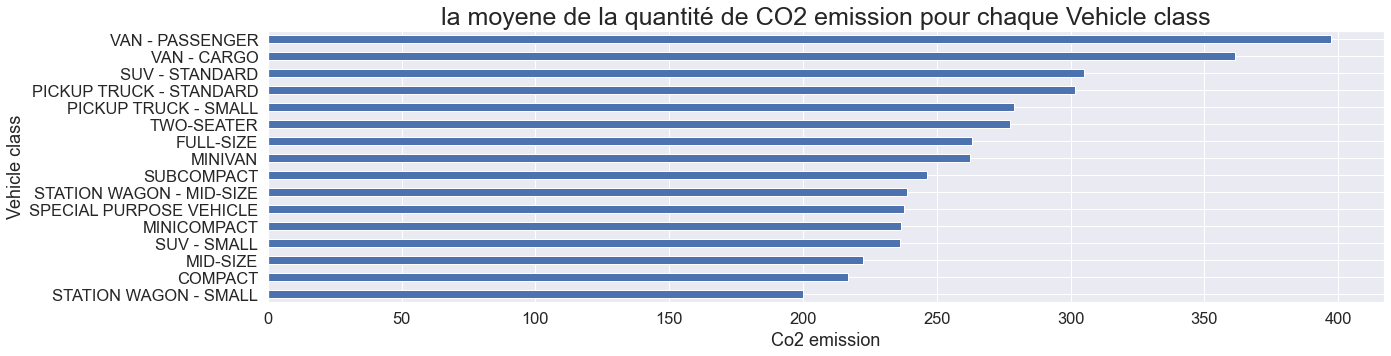

In [21]:
plt.figure(figsize=(20,5))

df.groupby('Vehicle Class')['CO2_Emissions'].mean().sort_values().plot(kind='barh')

plt.title('la moyene de la quantité de CO2 emission pour chaque Vehicle class', fontsize=25)
plt.xlabel('Co2 emission')
plt.ylabel('Vehicle class')
plt.show()

##### Here too, it can be seen that the brand of the vehicle influences the level of CO2 Emissions

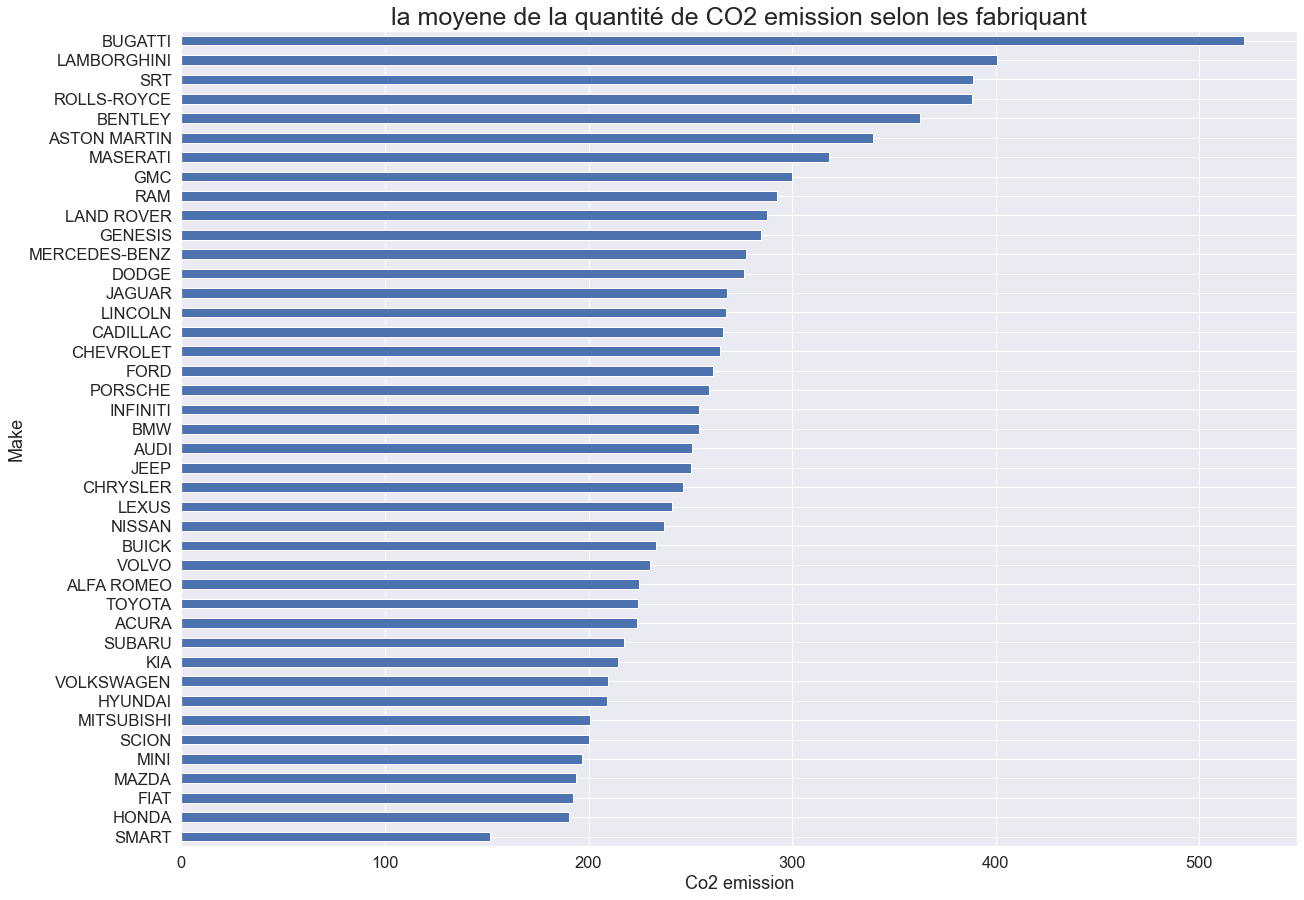

In [22]:
plt.figure(figsize=(20,15))
df.groupby('Make')['CO2_Emissions'].mean().sort_values().plot(kind='barh')
plt.title('la moyene de la quantité de CO2 emission selon les fabriquant', fontsize=25)
plt.xlabel('Co2 emission')
plt.ylabel('Make')
plt.show()

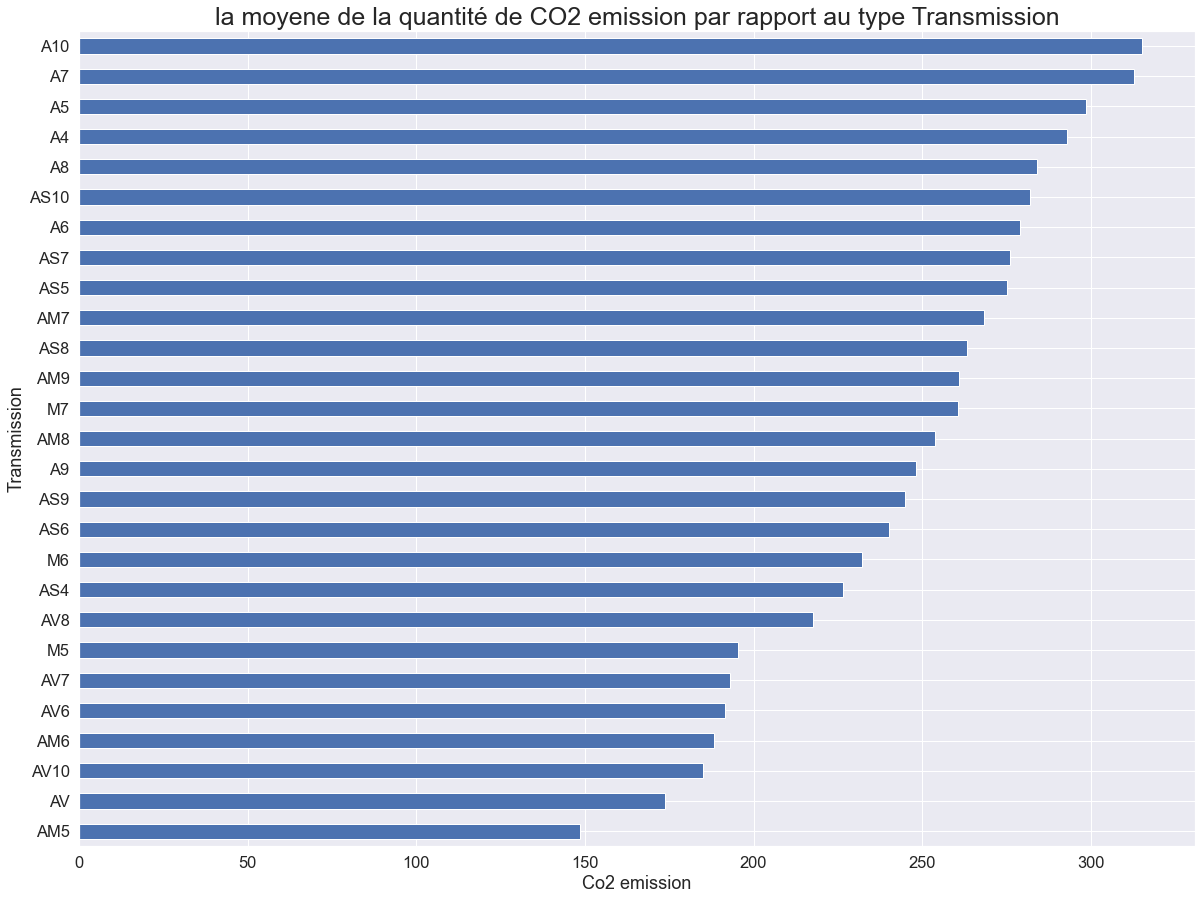

In [23]:
plt.figure(figsize=(20,15))
df.groupby('Transmission')['CO2_Emissions'].mean().sort_values().plot(kind='barh')
plt.title('the average amount of CO2 emission compared to the Transmission type', fontsize=25)
plt.xlabel('Co2 emission')
plt.ylabel('Transmission')
plt.show()

<Figure size 720x576 with 0 Axes>

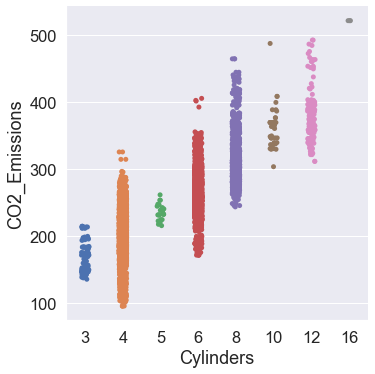

In [24]:
plt.figure(figsize=(10,8))

sns.catplot(x='Cylinders', y='CO2_Emissions',data = df)

plt.show()   

###### We observe that the quantity of CO2 Emissions increases with the number of cylinders

# Linear Regression 

### We start first with a linear regression model to answer our research question

### Correlation Matrix

The correlation DataFrame is:


Text(0.5, 1.0, 'Correlation')

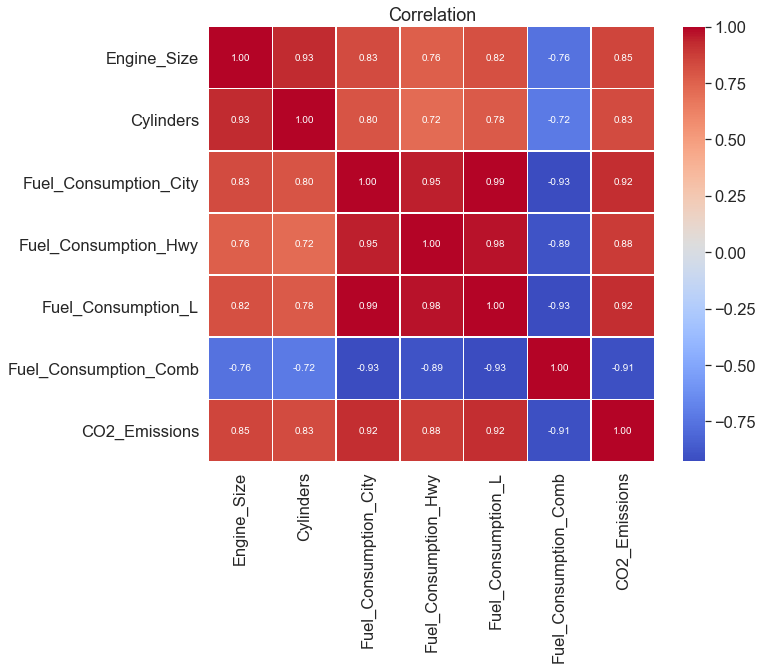

In [25]:
corr_df = df.corr()
print("The correlation DataFrame is:")
#Visualisation de la matrice de correlation
plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(corr_df, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation')

In [26]:
df[df.columns[1:]].corr()['CO2_Emissions'].sort_values()

Fuel_Consumption_Comb   -0.907553
Cylinders                0.832688
Engine_Size              0.851203
Fuel_Consumption_Hwy     0.883581
Fuel_Consumption_L       0.918151
Fuel_Consumption_City    0.919719
CO2_Emissions            1.000000
Name: CO2_Emissions, dtype: float64

# selection of variables
The target variable we are trying to predict is CO2 Emissions, according to the correlation matrix, this variable is strongly correlated with: Fuel Consumption City (L/100km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km), and Fuel Consumption Comb (mpg).

Following the correlation matrix we see that the following variables are strongly correlated: Fuel Consumption City (L/100km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), and Fuel Consumption Comb ( mpg).

At first we begin to visualize the relationship between the target variable and the other numerical variables to which it is correlated. 

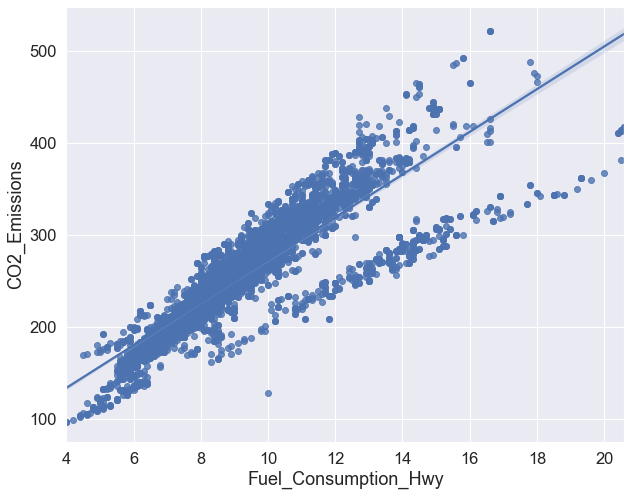

In [27]:
ax = sns.regplot(x='Fuel_Consumption_Hwy', y='CO2_Emissions', scatter=True, data=df)

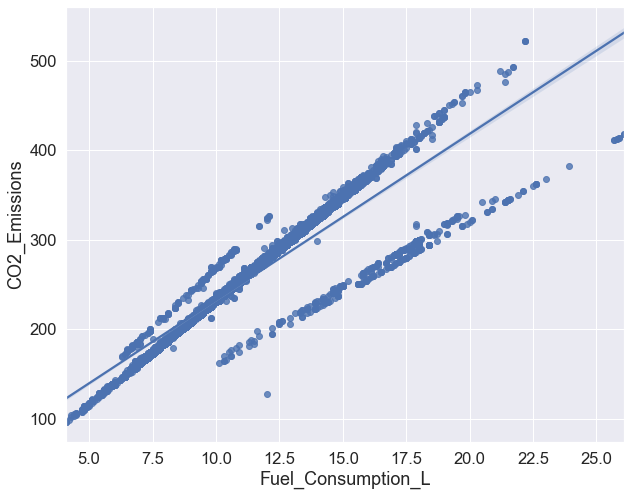

In [28]:
ax = sns.regplot(x='Fuel_Consumption_L', y='CO2_Emissions', scatter=True, data=df)

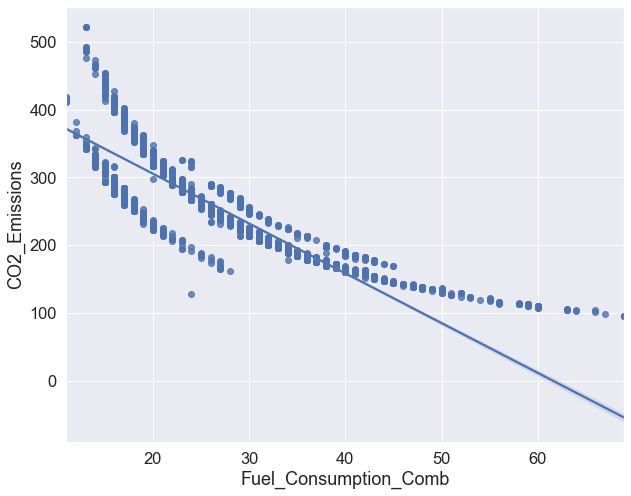

In [29]:
ax = sns.regplot(x='Fuel_Consumption_Comb', y='CO2_Emissions', scatter=True, data=df)

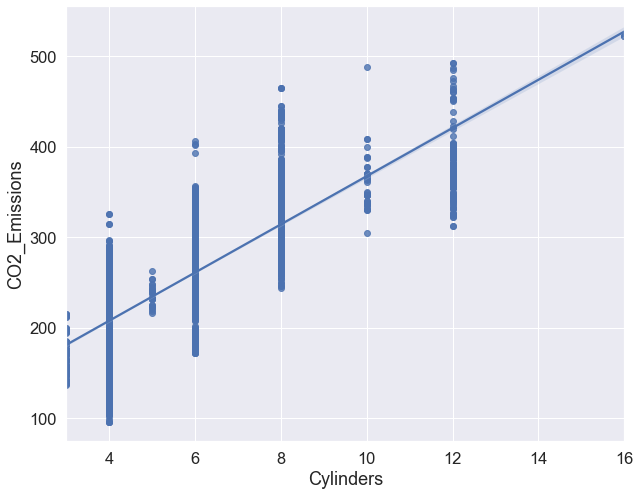

In [30]:
ax = sns.regplot(x='Cylinders', y='CO2_Emissions', scatter=True, data=df)

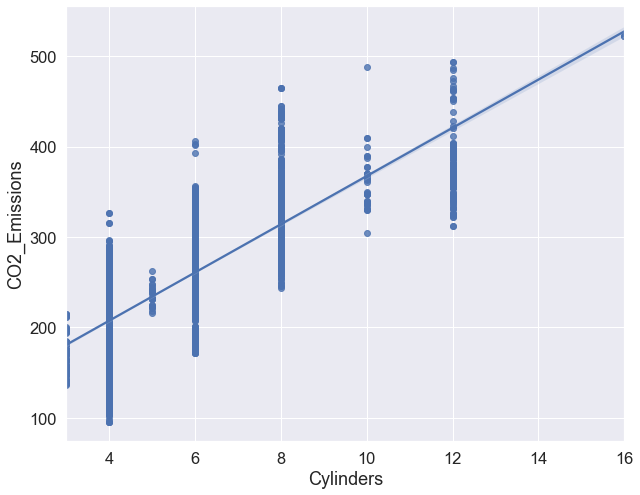

In [31]:
ax = sns.regplot(x='Cylinders', y='CO2_Emissions', scatter=True, data=df)

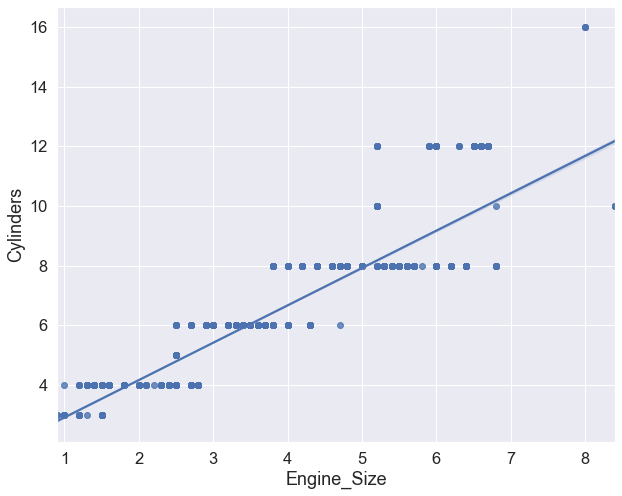

In [32]:
ax = sns.regplot(x='Engine_Size', y='Cylinders', scatter=True, data=df)

We can see that there is a strong linear relationship between the target variable (CO2_Emission) and 'Fuel_Consumption_L', as well as with Fuel_Consumption_Hwy, but it appears weak with 'Fuel_Consumption_Comb'.
For the variables 'Engine_size' and 'Cylinders' do not have a linear relationship with the variable we are trying to predict.

# Univariate Regression

###### We start with a univariate regression, there we choose as an explanatory variable, the one that is strongly correlated with the target variable, in other words:
#### predicted_CO2_Emission= intercept + coef*Fuel_Consumption_Comb_City

In [33]:
pd.options.mode.chained_assignment = None  # default='warn'

# Define our dependent variable
y_column = 'CO2_Emissions'
y = df[y_column]
# Define our independent variables
x_columns = ['Fuel_Consumption_City']
X = df[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['intercept'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = sm.OLS(endog=y_train, exog=X_train)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.231e+04
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:04:14   Log-Likelihood:                -26891.
No. Observations:                5907   AIC:                         5.379e+04
Df Residuals:                    5905   BIC:                         5.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Fuel_Consumption_City    15.33

the value of the intercept is given by :

In [35]:
model_fit.params.intercept

58.16594705683856

the coeficient associate to Fuel Consumption Comb City, is given by :

In [36]:
model_fit.params.Fuel_Consumption_City

15.33172273488773

In [37]:
y_pred_test = model_fit.predict(X_test)

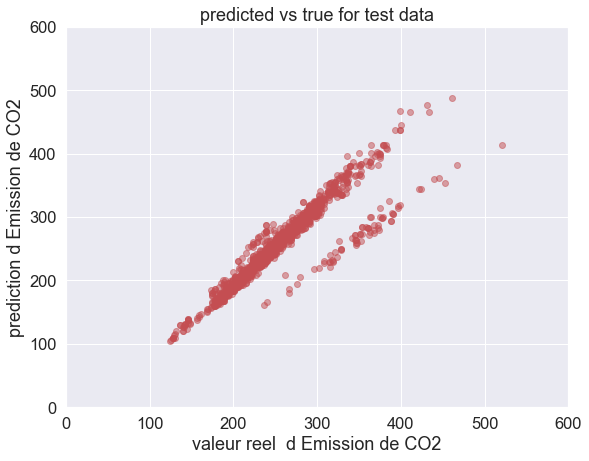

In [38]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('valeur reel  d Emission de CO2')
plt.ylabel('prediction d Emission de CO2' )
axes = plt.gca()
axes.set_xlim([0,600])
axes.set_ylim([0,600])
plt.show();

In [39]:
OutY_Predicted = y_pred_test
rsquared = y_test.corr(OutY_Predicted)**2
rsquared

0.8474339388984184

#### we obtained a value of R_squared large enough for both data (test & training), now let's visualize the relationship between the predicted values and the true values of our target variable

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

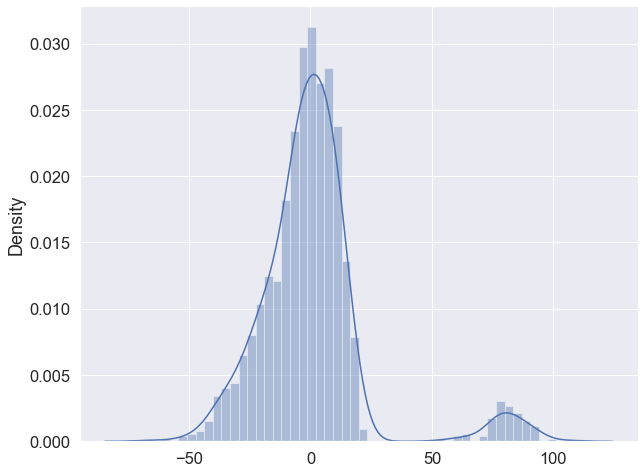

In [40]:
sns.distplot(y_pred_test-y_test)

Text(0, 0.5, 'y_pred')

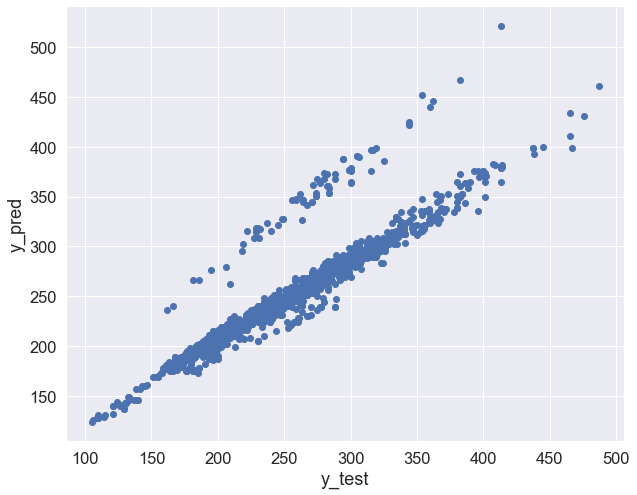

In [41]:
plt.scatter( y_test,y_pred_test)
plt.xlabel('y_test')
plt.ylabel('y_pred')


##### The results we got look consistently good (most points seem to be on the y=x line). But to have more precision We will try to improve this model by using the multivariate regression.

#  Multivariate Regression

##### At this level we will try to improve our model by adding another explanatory variable having a correlation with the target variable we are trying to predict (CO2 Emission)
##### First we will add the 'numeric' type variables
##### Based on the results obtained in the Exploratory Analysis part, we must choose the explanatory variables for our multivariate regression, taking into consideration the five hypotheses for using this model, namely:
1. Linear relationship between x and y
1. Normality
1. Minimal multicollinearity
1. No autocorrelation
1. Homoscedasticity

For this we choose as explanatory variables: 'Cylinder' and 'Fuel Consumption Comb'

In [42]:
pd.options.mode.chained_assignment = None  # default='warn'

# Define our dependent variable
y_column = 'CO2_Emissions'
y = df[y_column]
# Define our independent variables
x_columns = ['Fuel_Consumption_Comb','Cylinders']
X = df[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['intercept'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = sm.OLS(endog=y_train, exog=X_train)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                 2.423e+04
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:04:28   Log-Likelihood:                -25850.
No. Observations:                5907   AIC:                         5.171e+04
Df Residuals:                    5904   BIC:                         5.173e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Fuel_Consumption_Comb    -5.18

In [44]:
model = sm.OLS(endog=y_test, exog=X_test)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     5839.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:04:29   Log-Likelihood:                -6501.1
No. Observations:                1477   AIC:                         1.301e+04
Df Residuals:                    1474   BIC:                         1.302e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Fuel_Consumption_Comb    -5.13


### It's already GOOD!
We increased our adjusted R-squared from 0.84 to 0.88. Examination of the P values also tells us that all the coefficients are significant. 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

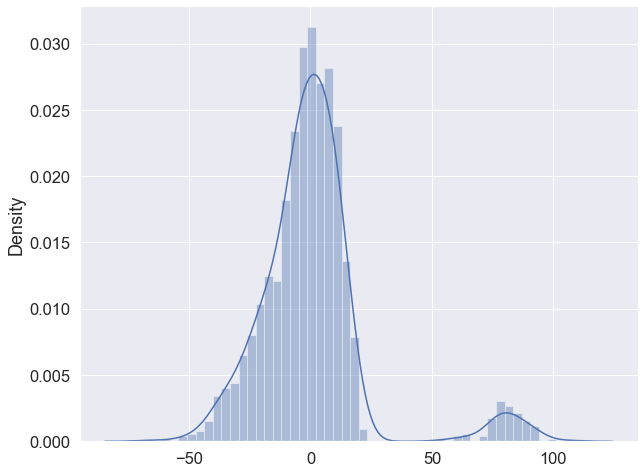

In [45]:
sns.distplot(y_pred_test-y_test)

#### Can we further improve our model? YES

To further improve our model we could include the categorical variables that we have not used so far (i.e. 'Fuel Type', 'Transmission', 'Make'), For this we must first transform our categorical data in numerical data 

In [65]:
#transformer les données de Fuel gaz en donnée numérique
df1 =pd.get_dummies(df['Fuel Type'], prefix='Fuel')
df2 = pd.get_dummies(df['Transmission'])
df3 = pd.get_dummies(df['Make'])
df1.head()
#df['Fuel Type'].unique()

Fuel_D  Fuel_E  Fuel_X  Fuel_Z
0       0       0       0       1
1       0       0       0       1
2       0       0       0       1
3       0       0       0       1
4       0       0       0       1

In [93]:
df_new = [df, df1,df3]
df_new = pd.concat(df_new, axis=1)
df_new.drop(['Fuel Type'], inplace=True, axis=1)
df_new.drop(['Transmission'], inplace=True, axis=1)
df_new.drop(['Make'], inplace=True, axis=1)
df_new.drop(['Model'], inplace=True, axis=1)
df_new.drop(['Vehicle Class'], inplace=True, axis=1)
df_new.drop(['Fuel_Consumption_City'], inplace=True, axis=1)
df_new.drop(['Engine_Size'], inplace=True, axis=1)
df_new.drop(['Fuel_Consumption_L'], inplace=True, axis=1)
df_new.drop(['CO2_Emissions'], inplace=True, axis=1)
df_new.drop(['Fuel_Consumption_Hwy'], inplace=True, axis=1)
df_new.head()

Cylinders  Fuel_Consumption_Comb  Fuel_D  Fuel_E  Fuel_X  Fuel_Z  ACURA  \
0          4                     33       0       0       0       1      1   
1          4                     29       0       0       0       1      1   
2          4                     48       0       0       0       1      1   
3          6                     25       0       0       0       1      1   
4          6                     27       0       0       0       1      1   

   ALFA ROMEO  ASTON MARTIN  AUDI  BENTLEY  BMW  BUGATTI  BUICK  CADILLAC  \
0           0             0     0        0    0        0      0         0   
1           0             0     0        0    0        0      0         0   
2           0             0     0        0    0        0      0         0   
3           0             0     0        0    0        0      0         0   
4           0             0     0        0    0        0      0         0   

   CHEVROLET  CHRYSLER  DODGE  FIAT  FORD  GENESIS  GMC  HONDA  HYUNDAI  \
0          0         0      0     0     0        0    0      0        0   
1          0         0      0     0     0        0    0      0        0   
2          0         0      0     0     0        0    0      0        0   
3          0         0      0     0     0        0    0      0        0   
4          0         0      0     0     0        0    0      0        0   

   INFINITI  JAGUAR  JEEP  KIA  LAMBORGHINI  LAND ROVER  LEXUS  LINCOLN  \
0         0       0     0    0            0           0      0        0   
1         0       0     0    0            0           0      0        0   
2         0       0     0    0            0           0      0        0   
3         0       0     0    0            0           0      0        0   
4         0       0     0    0            0           0      0        0   

   MASERATI  MAZDA  MERCEDES-BENZ  MINI  MITSUBISHI  NISSAN  PORSCHE  RAM  \
0         0      0              0     0           0       0        0    0   
1         0      0              0     0           0       0        0    0   
2         0      0              0     0           0       0        0    0   
3         0      0              0     0           0       0        0    0   
4         0      0              0     0           0       0        0    0   

   ROLLS-ROYCE  SCION  SMART  SRT  SUBARU  TOYOTA  VOLKSWAGEN  VOLVO  
0            0      0      0    0       0       0           0      0  
1            0      0      0    0       0       0           0      0  
2            0      0      0    0       0       0           0      0  
3            0      0      0    0       0       0           0      0  
4            0      0      0    0       0       0           0      0

#### Now that we have transformed our categorical data into numerical data we can build the multivariate regression model

In [94]:
pd.options.mode.chained_assignment = None  # default='warn'

# Define our dependent variable
y_column = 'CO2_Emissions'
y = df[y_column]
# Define our independent variables
X = df_new
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
X.head()

Cylinders  Fuel_Consumption_Comb  Fuel_D  Fuel_E  Fuel_X  Fuel_Z  ACURA  \
0          4                     33       0       0       0       1      1   
1          4                     29       0       0       0       1      1   
2          4                     48       0       0       0       1      1   
3          6                     25       0       0       0       1      1   
4          6                     27       0       0       0       1      1   

   ALFA ROMEO  ASTON MARTIN  AUDI  BENTLEY  BMW  BUGATTI  BUICK  CADILLAC  \
0           0             0     0        0    0        0      0         0   
1           0             0     0        0    0        0      0         0   
2           0             0     0        0    0        0      0         0   
3           0             0     0        0    0        0      0         0   
4           0             0     0        0    0        0      0         0   

   CHEVROLET  CHRYSLER  DODGE  FIAT  FORD  GENESIS  GMC  HONDA  HYUNDAI  \
0          0         0      0     0     0        0    0      0        0   
1          0         0      0     0     0        0    0      0        0   
2          0         0      0     0     0        0    0      0        0   
3          0         0      0     0     0        0    0      0        0   
4          0         0      0     0     0        0    0      0        0   

   INFINITI  JAGUAR  JEEP  KIA  LAMBORGHINI  LAND ROVER  LEXUS  LINCOLN  \
0         0       0     0    0            0           0      0        0   
1         0       0     0    0            0           0      0        0   
2         0       0     0    0            0           0      0        0   
3         0       0     0    0            0           0      0        0   
4         0       0     0    0            0           0      0        0   

   MASERATI  MAZDA  MERCEDES-BENZ  MINI  MITSUBISHI  NISSAN  PORSCHE  RAM  \
0         0      0              0     0           0       0        0    0   
1         0      0              0     0           0       0        0    0   
2         0      0              0     0           0       0        0    0   
3         0      0              0     0           0       0        0    0   
4         0      0              0     0           0       0        0    0   

   ROLLS-ROYCE  SCION  SMART  SRT  SUBARU  TOYOTA  VOLKSWAGEN  VOLVO  
0            0      0      0    0       0       0           0      0  
1            0      0      0    0       0       0           0      0  
2            0      0      0    0       0       0           0      0  
3            0      0      0    0       0       0           0      0  
4            0      0      0    0       0       0           0      0

In [96]:
model = sm.OLS(endog=y_train, exog=X_train)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1839.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:20:55   Log-Likelihood:                -24323.
No. Observations:                5907   AIC:                         4.874e+04
Df Residuals:                    5860   BIC:                         4.905e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Cylinders                 9.84

In [103]:
model1 = sm.OLS(endog=y_test, exog=X_test)
model1_fit = model1.fit()
print(model1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     448.8
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:35:31   Log-Likelihood:                -6144.1
No. Observations:                1477   AIC:                         1.238e+04
Df Residuals:                    1433   BIC:                         1.261e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Cylinders                10.58

#### Great News!
It's already good, we increased our R_squared from 0.88 to 0.93 by adding categorical covariates.

Examination of the p values also tells us that all the coefficients are significant.

In [109]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [110]:
y_pred = model.predict(X_test)
y_pred

array([339.34441591, 296.89583563, 333.49585174, ..., 330.00233941,
       192.52181859, 173.71014054])

In [111]:
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T

In [112]:
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred['pred_values'] = lin_pred['pred_values'].map(lambda x: round(x,2))

lin_pred

pred_values  real_values
0          339.34        368.0
1          296.90        290.0
2          333.50        382.0
3          213.34        211.0
4          194.46        193.0
...           ...          ...
1472       233.69        235.0
1473       259.14        263.0
1474       330.00        346.0
1475       192.52        193.0
1476       173.71        177.0

[1477 rows x 2 columns]

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2_Emissions', ylabel='Density'>

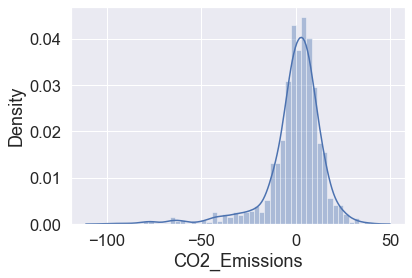

In [114]:
sns.distplot(y_pred-y_test)

Text(0, 0.5, 'y_pred')

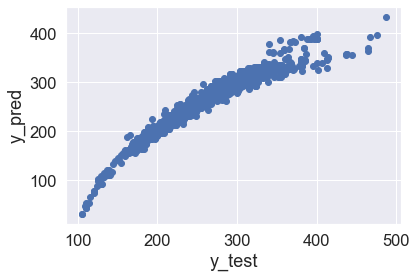

In [115]:
plt.scatter( y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

### Conclusion
We therefore managed to build a linear regression model to predict the values of CO2 emissions based on the characteristics of each vehicle.

# Clustering : K_means Algorithm

Clustering is a particular discipline of Machine Learning with the objective of separating data into homogeneous groups with common characteristics. The K-means algorithm is a well-known unsupervised algorithm in Clustering.

In this part of the notebook we will:
- Finding clusters with the k-means algorithm as an unsupervised learning technique.

In [116]:

# K-Means clustering algorithm
from sklearn.cluster import KMeans

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Places the plots in the Jupyter Notebook
%matplotlib inline

# PCA dimension reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Keep everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

In [117]:
# Keep only the relevant columns
column_1 = 'CO2_Emissions'
column_2 = 'Cylinders'
ds = df[[column_1, column_2]] 
ds.head(5)

CO2_Emissions  Cylinders
0            196          4
1            221          4
2            136          4
3            255          6
4            244          6

Let's choose some interesting continuous numerical features to analyze

## What is the link between CO2 emissions and the number of cylinders?

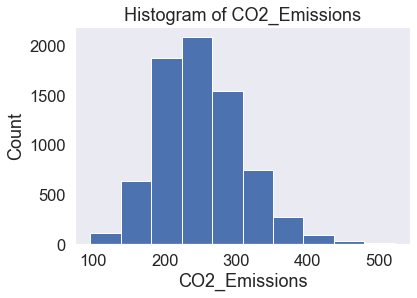

In [118]:
ax = ds.CO2_Emissions.hist(grid=False);

ax.set(xlabel='CO2_Emissions', 
       ylabel='Count', 
       title='Histogram of CO2_Emissions');  

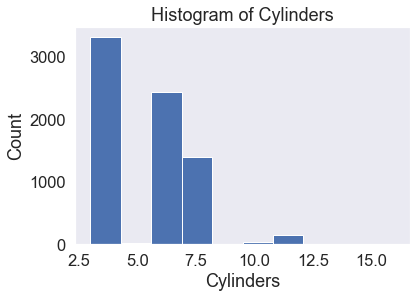

In [119]:
ax = ds.Cylinders.hist(grid=False);

ax.set(xlabel='Cylinders', 
       ylabel='Count', 
       title='Histogram of Cylinders');  

We observe a large number for vehicles with 4, 6 and 8 cylinders, while we have low values for the rest.

# Let's plot the relationship between these two variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


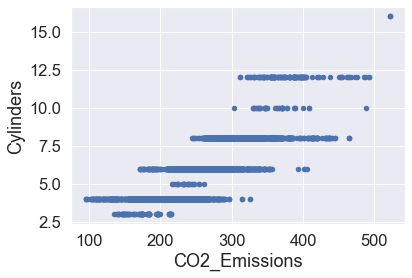

In [120]:
# Plot the relationship between these two variables
df.plot.scatter(x=column_1,
                y=column_2);

How can we interpret the relationship between CO2 emissions and cylinders?

A high CO2 emission is observed for vehicles with a large number of cylinders.

# Fit our data with k-means.

In [121]:
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=2) # Number of clusters should be 2 or 3
kmeans.fit(ds);

Now that we have clusters, let's visualize them.

In [122]:
# Add the cluster labels for each data point to the dataframe
ds['kmeans_labels'] = kmeans.labels_

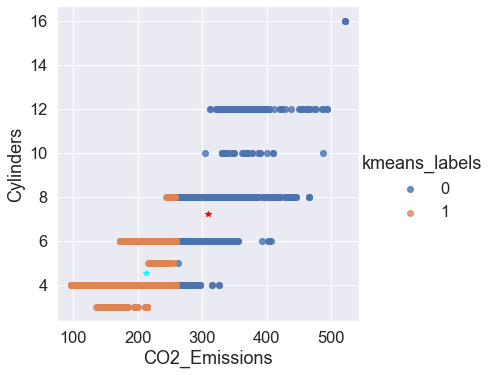

In [123]:
# Plot k-means
kmeans_plot = sns.lmplot(x=column_1, 
                       y=column_2, 
                       data=ds, 
                       fit_reg=False,        # Do not fit a regression line to the data
                       hue="kmeans_labels",  #'hue' will color code each group
                       legend=True);

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# # Plot the mean of cluster #3 (if present)
# kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

It is observed that the vehicles are divided into two groups. The first group are vehicles with low CO2 emissions with fewer cylinders (4, 6 cylinders) while the second group are vehicles with high CO2 emissions with a large number (8, 10 and 12 cylinders) of cylinders.

## Choose the number of clusters

## Elbow method to explore the number of clusters

Unlike supervised learning where we have the ground truth to evaluate the performance of the model, clustering analysis lacks a strong evaluation metric that we can use to evaluate the outcome of different clustering algorithms. Also, since kmeans requires k as input and does not learn it from the data, there is no right answer in terms of how many clusters we should have in any problem. Sometimes domain knowledge and intuition can help, but usually it doesn't. In cluster prediction methodology, we can evaluate the performance of models based on different K clusters since clusters are used in downstream modeling.

Even though we already know the optimal number of clusters, we thought we could still benefit from determining it using the elbow method.

In [124]:
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(ds).score(ds) 
              for i, model in enumerate(k_mean_models)]

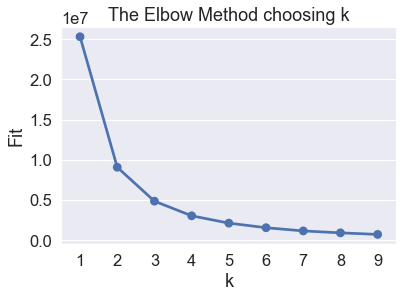

In [125]:
# Let's plot the effect k on the clustering
ax = sns.pointplot(x=list(k_values),
                   y=scores);
ax.set(xlabel='k', 
       ylabel='Fit', 
       title='The Elbow Method choosing k');

Ensuite, nous allons catégoriser les données en utilisant le nombre optimal de clusters 3.

Recommencer avec le nombre de cluster égale le nombre au coude trouvé

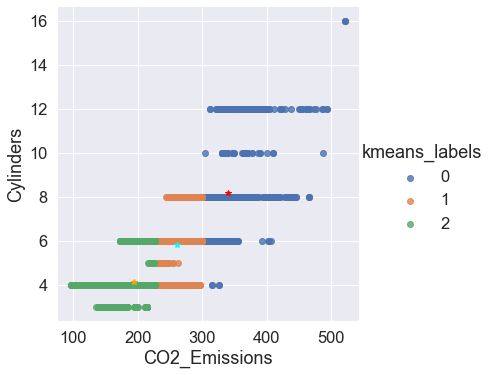

In [127]:
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=3) # Number of clusters should be 4
kmeans.fit(ds);

# Add the cluster labels for each data point to the dataframe
ds['kmeans_labels'] = kmeans.labels_

# Plot k-means
kmeans_plot = sns.lmplot(x=column_1,
                       y=column_2, 
                       data=ds, 
                       fit_reg=False,        # Do not fit a regression line to the data
                       hue="kmeans_labels",  #'hue' will color code each group
                       legend=True);

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# Plot the mean of cluster #3
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

L'algorithme a regroupé les véhicule en trois groupes : des véhicules d'une faible émissions de CO2, des véhicules d'une moyenne émissions de CO2 et des véhicules d'une forte émissions de CO2 en fonctionne du nombre de cylinders.

## Quel est le lien entre l'emissions de CO2 et le nombre la taille du moteur ?

In [128]:
#df = df.rename(columns={'CO2 Emissions(g/km)':'co2_emission'})
df = df.rename(columns={'Engine Size(L)':'Engine_Size'})

In [129]:
# Keep only the relevant columns
column_3 = 'CO2_Emissions'
column_4 = 'Engine_Size'
dk = df[[column_3, column_4]]

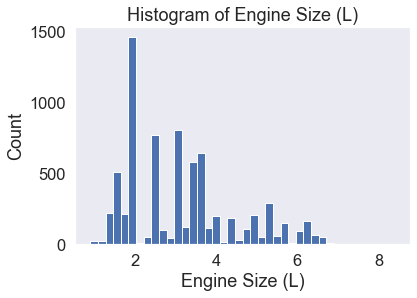

In [130]:
ax = dk.Engine_Size.hist(grid=False,bins=40);

ax.set(xlabel='Engine Size (L)', 
       ylabel='Count', 
       title='Histogram of Engine Size (L)'); 

On observe un nombre important des moteurs de taille 2.

# Traçons la relation entre ces deux variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


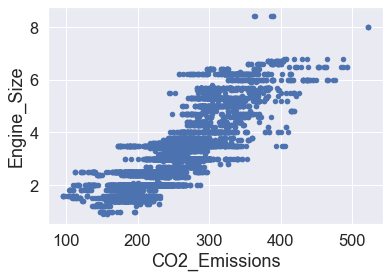

In [132]:
# Plot the relationship between these two variables
df.plot.scatter(x=column_3,
                y=column_4);

On obserbe que la quantité d'emissions de CO2 s'augmente avec l'augmentation du nombre de moteurs.

## Ajuster nos données avec k-means.

In [133]:
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=2) # Number of clusters should be 2 or 3
kmeans.fit(dk);

Maintenant que nous avons des clusters, on va de les visualiser.

In [134]:
# Add the cluster labels for each data point to the dataframe
dk['kmeans_labels'] = kmeans.labels_

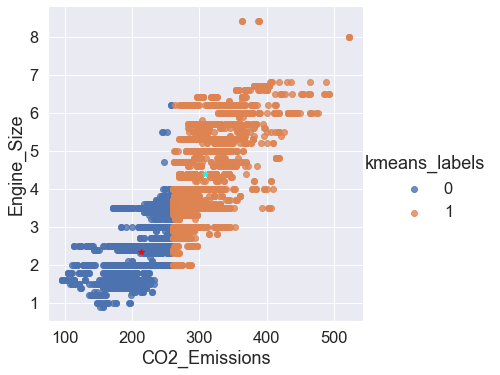

In [135]:
# Plot k-means
kmeans_plot = sns.lmplot(x=column_3, 
                       y=column_4, 
                       data=dk, 
                       fit_reg=False,        # Do not fit a regression line to the data
                       hue="kmeans_labels",  #'hue' will color code each group
                       legend=True);

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

On observe que les véhicules sont divisées en deux groupes. Le premier groupe sont les véhicules d'une faible émissions de CO2 avec moins des moteurs de petite taille alors que le deuxième groupe sont les véhicules d'une forte émissions de CO2 avec des moteurs de grande taille.

## Choisir le nombre de clusters

## Méthode du coude pour explorer le nombre de clusters

De même, on va déterminer le nombre optimal de clusters à l'aide de la méthode du coude

In [136]:
# Let's fit a different model for each value of k
k_values = range(1, 10)

# Fit a model for each value of k
k_mean_models = [KMeans(n_clusters=i) for i in k_values]

# See how the scores change
scores = [-k_mean_models[i].fit(dk).score(dk) 
              for i, model in enumerate(k_mean_models)] 

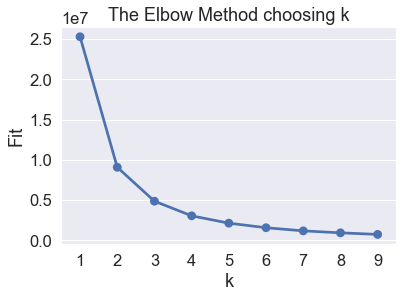

In [137]:
# Let's plot the effect k on the clustering
ax = sns.pointplot(x=list(k_values),
                   y=scores);
ax.set(xlabel='k', 
       ylabel='Fit', 
       title='The Elbow Method choosing k');

the optimal number of clusters is 3.

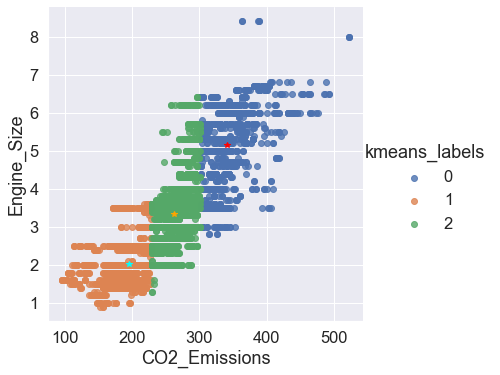

In [138]:
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=3) # Number of clusters should be 4
kmeans.fit(dk);

# Add the cluster labels for each data point to the dataframe
dk['kmeans_labels'] = kmeans.labels_

# Plot k-means
kmeans_plot = sns.lmplot(x=column_3,
                       y=column_4, 
                       data=dk, 
                       fit_reg=False,        # Do not fit a regression line to the data
                       hue="kmeans_labels",  #'hue' will color code each group
                       legend=True);

# Plot the mean of cluster #1
kmeans_plot.ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color='red', marker='*');

# Plot the mean of cluster #2
kmeans_plot.ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color='cyan', marker='*');

# Plot the mean of cluster #3
kmeans_plot.ax.plot(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color='orange', marker='*');

The algorithm grouped the vehicles into three groups: low CO2 emission vehicles, medium CO2 emission vehicles and high CO2 emission vehicles based on engine size.

# Conclusion


The k-means algorithm grouped our data into groups according to the amount of CO2 emissions depending on the number of cylinders or the size of the engines. In both cases we observed that the groups we obtained are not well divided, so we can conclude that the k-means is not a suitable model for our datase